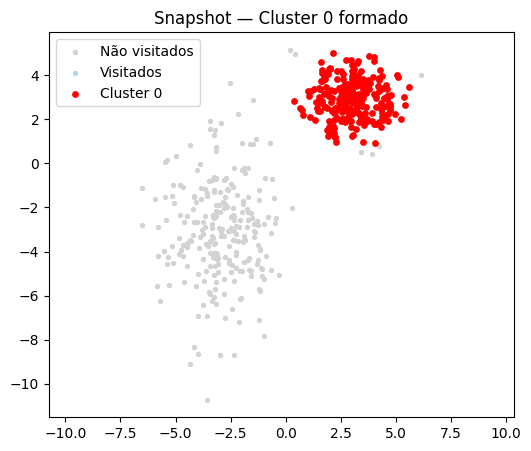

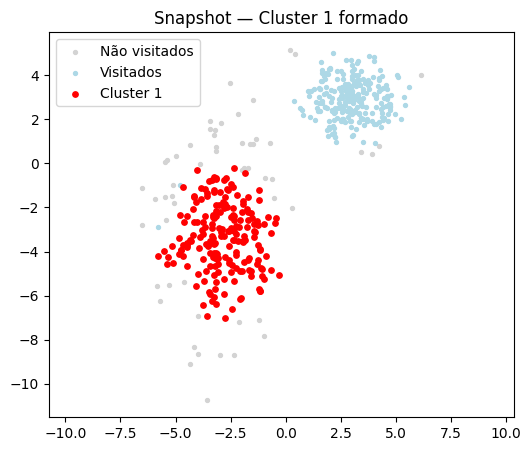

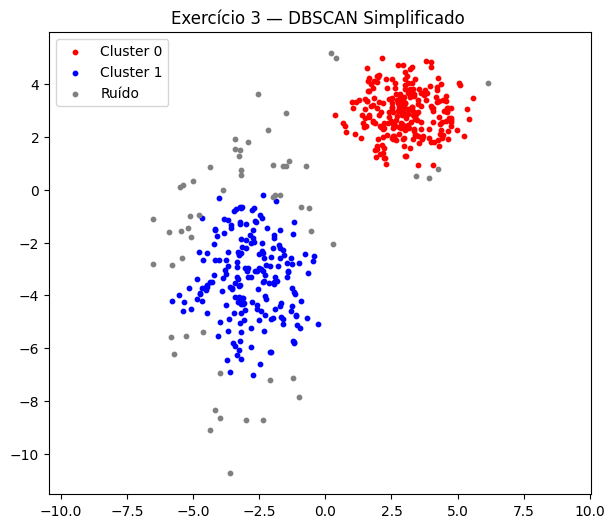

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Conjunto A (gerado em torno do ponto [3, 3])
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 250).T

# Conjunto B (gerado em torno de [-3, -3])
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 250).T

# Juntamos os dois conjuntos (ficam 500 pontos)
c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T

# Convertendo para lista de pontos, cada linha é [x, y]
pontos = c.T.tolist()
n = len(pontos)

# Parâmetros do DBSCAN
eps = 0.8       # raio de vizinhança
minPts = 10     # número mínimo de vizinhos min

# Inicialização
visited = [False] * n      # lista de pontos visitados
cluster = [-1] * n         # cada ponto começa como ruído (-1)
cluster_id = 0             # identificador dos clusters que vai sendo aumentado

# Função que calcula a distância entre dois pontos
def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Função que devolve a lista de vizinhos dentro do raio eps
def vizinhos(idx):
    lista = []
    for i in range(n):
        if distancia(pontos[idx], pontos[i]) < eps:
            lista.append(i)
    return lista


# Algoritmo principal do DBSCAN

for i in range(n):
    # Ignora o ponto se já foi visitado
    if visited[i]:
        continue

    visited[i] = True
    neigh = vizinhos(i)  # encontra os vizinhos do ponto i

    # Se o ponto tem poucos vizinhos, é considerado ruído
    if len(neigh) < minPts:
        cluster[i] = -1
        continue

    # Caso contrário, começa um novo cluster
    cluster[i] = cluster_id
    expand = list(neigh)  # lista com os pontos que vão ser verificados

    # Expansão do cluster
    while expand:
        p = expand.pop()  # retira o último ponto da lista
        if not visited[p]:
            visited[p] = True
            neigh2 = vizinhos(p)
            # Se este ponto também for “denso”, adiciona os seus vizinhos
            if len(neigh2) >= minPts:
                expand.extend(neigh2)
        # Se o ponto estava como ruído, passa a fazer parte do cluster
        if cluster[p] == -1:
            cluster[p] = cluster_id

    # Gráfico intermédio para mostrar o progresso
    plt.figure(figsize=(6,5))

    # Pontos ainda não visitados
    nao_visitados = [pontos[k] for k in range(n) if not visited[k]]
    if nao_visitados:
        plt.scatter([p[0] for p in nao_visitados],
                    [p[1] for p in nao_visitados],
                    color='lightgray', s=8, label="Não visitados")

    # Pontos que já foram visitados
    visitados = [pontos[k] for k in range(n) if visited[k]]
    if visitados:
        plt.scatter([p[0] for p in visitados],
                    [p[1] for p in visitados],
                    color='lightblue', s=8, label="Visitados")

    # Pontos que pertencem ao cluster atual
    atual = [pontos[k] for k in range(n) if cluster[k] == cluster_id]
    if atual:
        plt.scatter([p[0] for p in atual],
                    [p[1] for p in atual],
                    color='red', s=15, label=f"Cluster {cluster_id}")

    plt.title(f"Snapshot — Cluster {cluster_id} formado")
    plt.axis("equal")
    plt.legend()
    plt.show()

    # Passa ao próximo cluster
    cluster_id += 1


# Resultado final do DBSCAN

plt.figure(figsize=(7,6))
cores = ["red", "blue", "green", "orange", "purple", "brown"]

# Desenha cada cluster com uma cor diferente
for cid in range(cluster_id):
    grupo = [pontos[k] for k in range(n) if cluster[k] == cid]
    if grupo:
        plt.scatter([p[0] for p in grupo],
                    [p[1] for p in grupo],
                    color=cores[cid % len(cores)], s=10, label=f"Cluster {cid}")

# Mostra os pontos classificados como ruído
ruido = [pontos[k] for k in range(n) if cluster[k] == -1]
if ruido:
    plt.scatter([p[0] for p in ruido],
                [p[1] for p in ruido],
                color='gray', s=10, label="Ruído")

plt.axis("equal")
plt.title("Exercício 3 — DBSCAN Simplificado ")
plt.legend()
plt.show()
